In [1]:
## Importing Important libraries.
#import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

### Laoding MNIST data from Keras Library.

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [3]:
### Finding the shpe and size of train and test dataset.
X_train.shape, X_test.shape

### 28,28n is the Image shape.

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[3]

3

### Visualising the image.

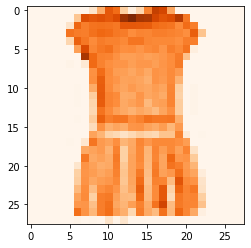

In [7]:
plt.imshow(X_train[3],cmap='Oranges')

In [8]:
### Finding the Class labels/Outputs.
class_labels=['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

### Plotting All Images form Dataset.

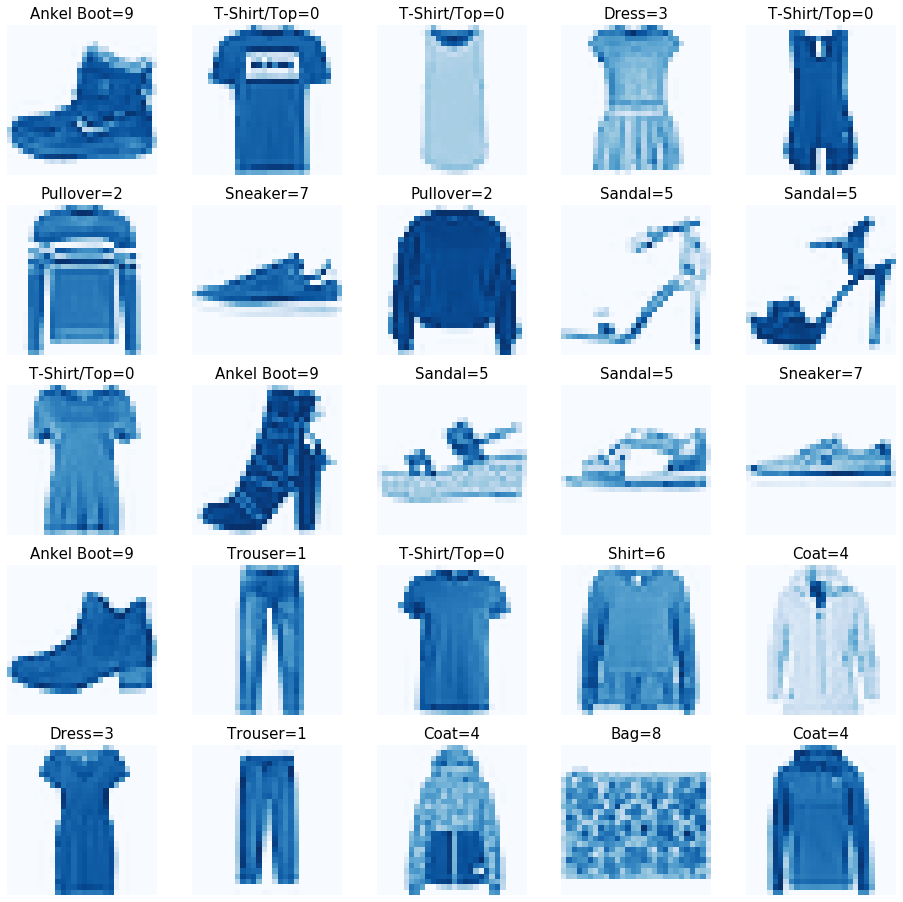

In [9]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='Blues')
    plt.axis('off')
    plt.title(class_labels[y_train[i]]+"="+str(y_train[i]),fontsize=15)

### Applying Feature Scalling Techinique.
 To converts all values into 0 to 1 range.

In [10]:
### For converting all training and testing values into 0 to 1 range we need to divide those data by 255.
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building Neural Network Model.

In [12]:
## Importing Important Libraries.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [13]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model.

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
## Fitting training data.
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5514 - accuracy: 0.8099
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4177 - accuracy: 0.8536
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3828 - accuracy: 0.8652
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3598 - accuracy: 0.8718
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3438 - accuracy: 0.8768
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3305 - accuracy: 0.8815
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3181 - accuracy: 0.8847
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3099 - accuracy: 0.8888
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3026 - accuracy: 0.8900
Epoch 10/10
60000/60000 [============

### Test and Evaluate Neural Network. 

In [17]:
y_pred=model.predict(X_test)
print(y_pred)

[[3.7647280e-07 1.8318559e-08 1.3016209e-07 ... 1.5544887e-02
  6.1809644e-04 9.6064043e-01]
 [8.1471908e-06 5.3727903e-12 9.7731858e-01 ... 7.6058869e-14
  4.9836916e-07 1.4744530e-12]
 [1.9076212e-07 9.9999893e-01 2.6853286e-08 ... 1.4248069e-13
  1.2301642e-09 4.4428805e-12]
 ...
 [1.8483459e-04 4.1785242e-08 2.9213968e-05 ... 2.9718158e-06
  9.9898201e-01 1.4886388e-10]
 [3.2615480e-07 9.9924624e-01 5.4849647e-07 ... 1.9010884e-08
  1.4555258e-08 2.1630697e-06]
 [1.5743061e-04 1.0769617e-07 5.6067962e-05 ... 3.5280492e-03
  2.3137610e-03 1.8675342e-05]]


### Finding Accuracy of Model.


In [18]:
result=model.evaluate(X_test,y_test)
print(result)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3854 - accuracy: 0.8639
[0.3854003000020981, 0.8639]


In [19]:
y_pred[2]

array([1.9076212e-07, 9.9999893e-01, 2.6853286e-08, 6.7815625e-07,
       1.1945629e-07, 2.6455923e-16, 5.4770122e-09, 1.4248069e-13,
       1.2301642e-09, 4.4428805e-12], dtype=float32)

In [20]:
np.argmax(y_pred[2].round(2))

1

In [21]:
y_test[2]

1

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,[np.argmax(i) for i in y_pred])
print(cm)

[[733   2  11  88   8   1 146   0  11   0]
 [  0 955   0  37   5   0   2   0   1   0]
 [ 13   0 722  24 144   0  97   0   0   0]
 [  7   3  11 934  23   1  18   0   3   0]
 [  0   0  62  47 827   4  58   0   2   0]
 [  0   0   0   1   0 915   0  40   2  42]
 [ 85   0  76  62  89   0 676   0  12   0]
 [  0   0   0   0   0   7   0 956   1  36]
 [  2   0   3  10   8   1  10   6 960   0]
 [  0   0   0   1   0   2   1  35   0 961]]


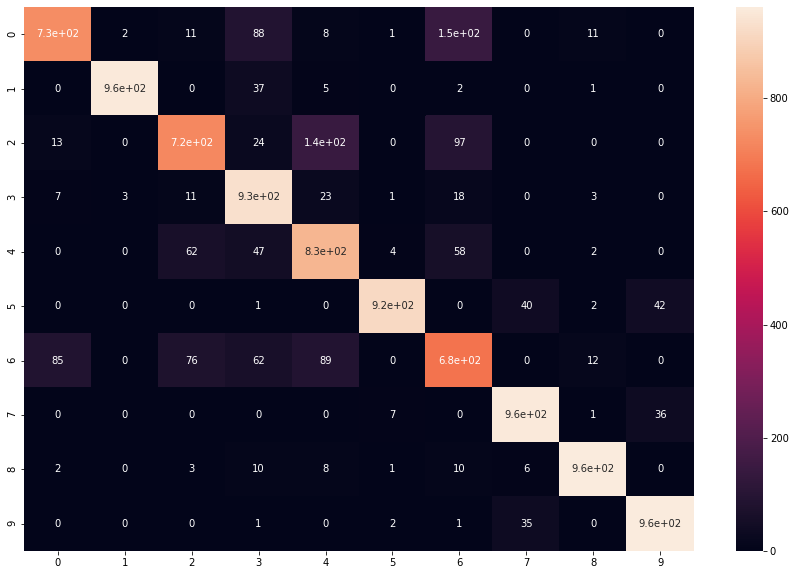

In [23]:
### Plotting Confusion matix in Visualizing form.
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

### Classification Report.

In [24]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,[np.argmax(i) for i in y_pred],target_names=class_labels)
print(clr)

              precision    recall  f1-score   support

 T-Shirt/Top       0.87      0.73      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.82      0.72      0.77      1000
       Dress       0.78      0.93      0.85      1000
        Coat       0.75      0.83      0.79      1000
      Sandal       0.98      0.92      0.95      1000
       Shirt       0.67      0.68      0.67      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankel Boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

